 ## The CRISP-DM method will be applied here to keep track of the analysis process.

To get started, let's read in the necessary libraries we will need to wrangle our data: pandas and numpy. If we decided to build some basic plots, matplotlib might prove useful as well.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Business Understanding

COVID-19 is wreaking havoc across the globe!

I will focus on the three question below:

1. What Are The Top 10 Countries In Terms Of Confirmed Cases And Fatalities And How They Compare With Each Other?
2. What Are The Top States In Terms Of Confirmed Cases In China And US ?
3. Which Country Is Able To Control The Spread Of COVID-19 ?

## 2. Data Understanding

Reading The COVID-19 Dataset

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head() # Displaying First 5 Records

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [4]:
df.shape[0]

19698

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19698 entries, 0 to 19697
Data columns (total 6 columns):
Id                19698 non-null int64
Province_State    8375 non-null object
Country_Region    19698 non-null object
Date              19698 non-null object
ConfirmedCases    19698 non-null float64
Fatalities        19698 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 923.4+ KB


In [6]:
df.columns

Index(['Id', 'Province_State', 'Country_Region', 'Date', 'ConfirmedCases',
       'Fatalities'],
      dtype='object')

In [7]:
df.isnull().sum()

Id                    0
Province_State    11323
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

## 3. Prepare Data

There are some necessary stpes to apply before continue exploring the dataset:

1. Drop unused columns

2. Convert string values to number

3. Handle missing values, drop them if necessary

## Now to look at our first question of interest: What Are The Top 10 Countries In Terms Of Confirmed Cases And Fatalities And How They Compare With Each Other?

In [8]:
top = df.fillna('NA').groupby(['Country_Region','Province_State','Date'])['ConfirmedCases'].sum() \
                          .groupby(['Country_Region','Province_State']).max().sort_values() \
                          .groupby(['Country_Region']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(top).head(10)

In [9]:
top_death = df.fillna('NA').groupby(['Country_Region','Province_State','Date'])['Fatalities'].sum() \
                          .groupby(['Country_Region','Province_State']).max().sort_values() \
                          .groupby(['Country_Region']).sum().sort_values(ascending = False)

top10_death = pd.DataFrame(top_death).head(10)

In [10]:
confirmed_top10 = top10['ConfirmedCases'].sum()

In [11]:
death_top10 = top10_death['Fatalities'].sum()

Now Let's Find What Percentage Of The Total Cases Are Coming From Top 10 Countries And Name Of Those Countries

In [12]:
confirmed_top10 /  df.groupby('Date',as_index = False).sum().drop(['Id','Date'],axis = 1).tail(1)['ConfirmedCases'].values

array([0.8199549])

In [13]:
countries = top10.index.values
print(countries)

['US' 'Italy' 'China' 'Spain' 'Germany' 'France' 'Iran' 'United Kingdom'
 'Switzerland' 'Netherlands']


We Can See That's Astonishing More Than 80% Of The Cases Are In Top 10 Countries.Now Let's Look At What Percentage Of The Total Fatalities Are Coming From Top 10 Countries By Fatalities And Name Of Those Countries.

In [14]:
death_top10 / df.groupby('Date',as_index = False).sum().drop(['Id','Date'],axis = 1).tail(1)['Fatalities'].values

array([0.93353129])

In [15]:
countries = top10_death.index.values
print(countries)

['Italy' 'Spain' 'China' 'Iran' 'France' 'US' 'United Kingdom'
 'Netherlands' 'Germany' 'Belgium']


That's Even More Astonishing That Nearly 93% Of The Deaths Are From Top 10 Countries By Fatalities

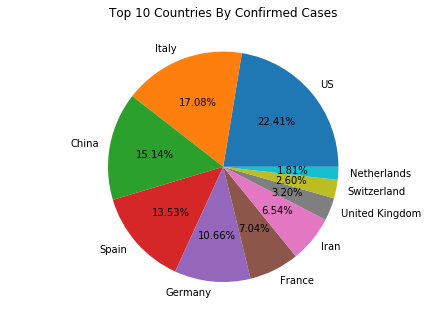

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
plt.title('Top 10 Countries By Confirmed Cases')
country = top10.index.values
confirmed = top10['ConfirmedCases']
ax.pie(confirmed, labels = country,autopct='%1.2f%%')
plt.show()

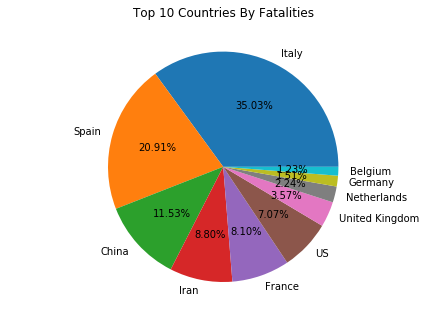

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
plt.title('Top 10 Countries By Fatalities')
country = top10_death.index.values
confirmed = top10_death['Fatalities']
ax.pie(confirmed, labels = country,autopct='%1.2f%%')
plt.show()

By Reading The Above Plots We Can Conclude That US Has Highest Count In Terms Of Confirmed Cases Whereas Italy Has Highest Count In Terms Of Fatalities

Now Let's Analyze Data Of China,India,Italy And US.

In [18]:
# Country Wise Data
df_india = df[df['Country_Region'] == 'India'].drop(['Id'],axis = 1)
df_china = df[df['Country_Region'] == 'China'].drop(['Id'],axis = 1)
df_us = df[df['Country_Region'] == 'US'].drop(['Id'],axis = 1)
df_italy = df[df['Country_Region'] == 'Italy'].drop(['Id'],axis = 1)

In [19]:
# Latest Country Wise Numbers As On 2020-03-28
latest_us = df_us[df_us['Date'] == '2020-03-28']
latest_china = df_china[df_china['Date'] == '2020-03-28']
latest_india = df_india[df_india['Date'] == '2020-03-28']
latest_italy = df_italy[df_italy['Date'] == '2020-03-28']

In [20]:
print('US Total Confirmed Cases : ' + str(latest_us['ConfirmedCases'].sum()))
print('China Total Confirmed Cases : ' + str(latest_china['ConfirmedCases'].sum()))
print('India Total Confirmed Cases : ' + str(latest_india['ConfirmedCases'].sum()))
print('Italy Total Confirmed Cases : ' + str(latest_italy['ConfirmedCases'].sum()))

US Total Confirmed Cases : 121326.0
China Total Confirmed Cases : 81999.0
India Total Confirmed Cases : 987.0
Italy Total Confirmed Cases : 92472.0


## Now to look at our second question of interest: What Are The Top States In Terms Of Confirmed Cases In China And US ?

In [21]:
def bar_plot(country,df):
    labels = df['Province_State'].values
    sizes = df['ConfirmedCases'].values
    plt.figure(figsize=(10,10))
    plt.title(country + ' Statewise Confirmed Cases As On 28/03/2020')
    plt.barh(labels,sizes, align='center')
    plt.xlabel('Total Cases')
    plt.ylabel('States')
    plt.show()

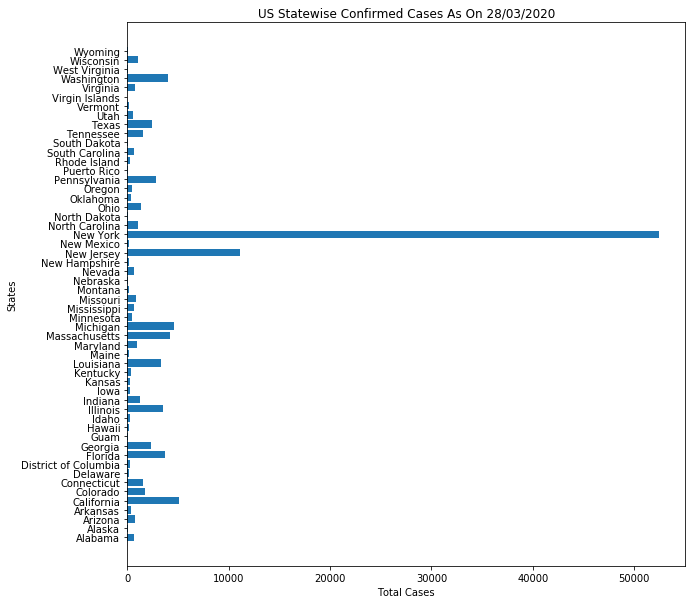

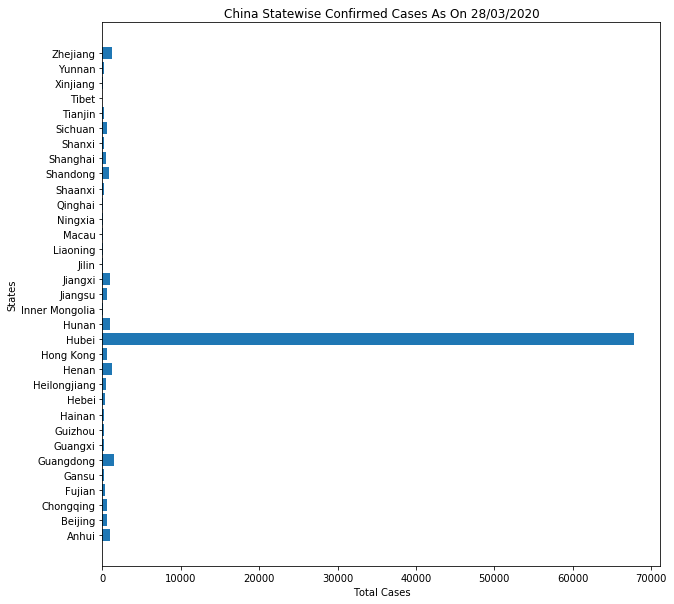

In [22]:
bar_plot('US',latest_us)
bar_plot('China',latest_china)

We Can Clearly Observe From The Horizontal Bar Graph That New York Is The Most Affected State In US In Terms Of Confirmed Case Whereas Hubei Is The Most Affected State In China In Terms Of Confirmed Cases.

Now Let's Look At Daily Count Of Confirmed Cases And Fatalities Of The Whole World

In [23]:
world_confirmed = df.groupby('Date',as_index = False).sum().drop(['Id','Date'],axis = 1)

In [24]:
world_daily = world_confirmed.diff()

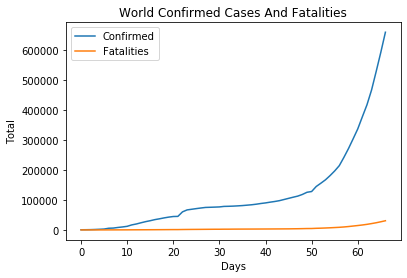

In [25]:
plt.plot(world_confirmed)
plt.title('World Confirmed Cases And Fatalities')
plt.legend(['Confirmed','Fatalities'])
plt.xlabel('Days')
plt.ylabel('Total')
plt.show()

Also Let's Look At Daily New Confirmed Cases And Fatalities Of The Whole World

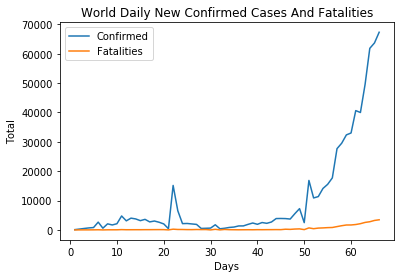

In [26]:
plt.plot(world_daily)
plt.title('World Daily New Confirmed Cases And Fatalities')
plt.legend(['Confirmed','Fatalities'])
plt.xlabel('Days')
plt.ylabel('Total')
plt.show()

Writing Helper Function To Plot Confirmed Cases And Fatalities Statewise And Countrywise

In [27]:
def plot_state_wise(state,df): 
    state_wise_confirmed = df[df['Province_State'] == state]['ConfirmedCases'].values
    state_wise_deaths = df[df['Province_State'] == state]['Fatalities'].values
    plt.plot(state_wise_confirmed)
    plt.plot(state_wise_deaths)
    plt.title(state + ' Confirmed Cases And Fatalities')
    plt.legend(['Confirmed','Fatalities'])
    plt.xlabel('Days')
    plt.ylabel('Total')
    plt.show()

In [28]:
def plot_country_wise(country,df):
    country_wise_confirmed = df[df['Country_Region'] == country]['ConfirmedCases'].values
    country_wise_deaths = df[df['Country_Region'] == country]['Fatalities'].values
    plt.plot(country_wise_confirmed)
    plt.title(country + ' Confirmed Cases And Fatalities')
    plt.plot(country_wise_deaths)
    plt.legend(['Confirmed','Fatalities'])
    plt.xlabel('Days')
    plt.ylabel('Total')
    plt.show()
    

Plotting Confirmed Cases And Fatalities In India

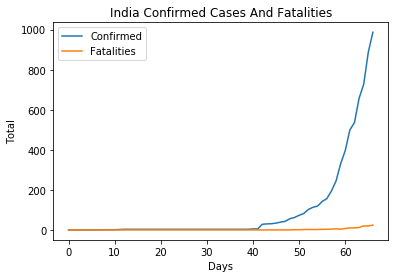

In [29]:
plot_country_wise('India',df)

Plotting Confirmed Cases And Fatalities In Italy

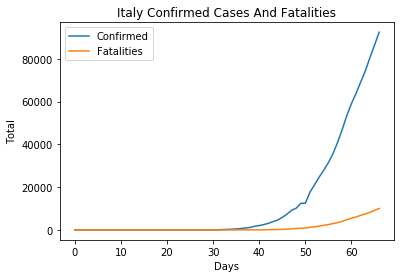

In [30]:
plot_country_wise('Italy',df)

Consolidating Statewise Data To Countrywise Data Of US And China

In [31]:
df_us_consolidated = df_us.groupby('Date').sum()
df_china_consolidated = df_china.groupby('Date').sum()

Plotting Confirmed Cases And Fatalities In US

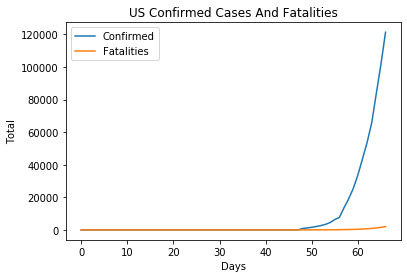

In [32]:
plt.plot(df_us_consolidated['ConfirmedCases'].values)
plt.title('US Confirmed Cases And Fatalities')
plt.plot(df_us_consolidated['Fatalities'].values)
plt.legend(['Confirmed','Fatalities'])
plt.xlabel('Days')
plt.ylabel('Total')
plt.show()

Plotting Confirmed Cases And Fatalities In China

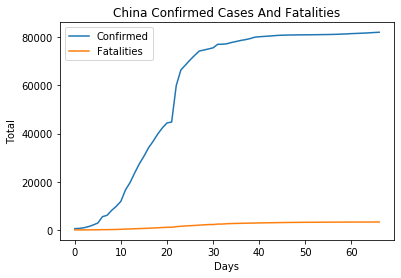

In [33]:
plt.plot(df_china_consolidated['ConfirmedCases'].values)
plt.title('China Confirmed Cases And Fatalities')
plt.plot(df_china_consolidated['Fatalities'].values)
plt.legend(['Confirmed','Fatalities'])
plt.xlabel('Days')
plt.ylabel('Total')
plt.show()

Plotting State Wise Confirmed And Fatalities Of China And US

In [34]:
# Retrieving Names Of Every Affected States
us_states = list(df_us['Province_State'].value_counts().keys())
china_states = list(df_china['Province_State'].value_counts().keys())

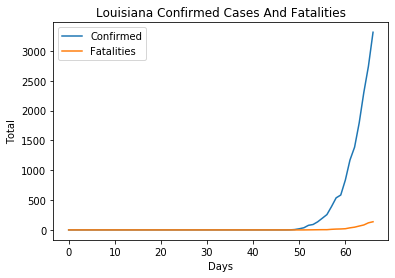

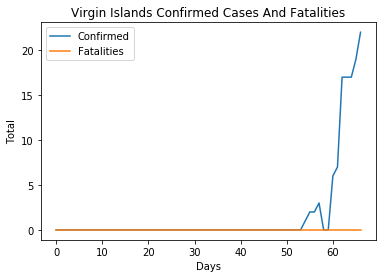

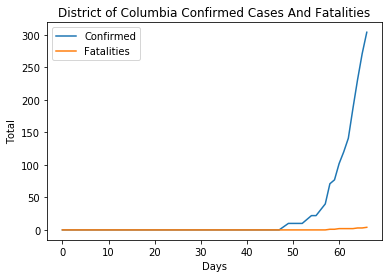

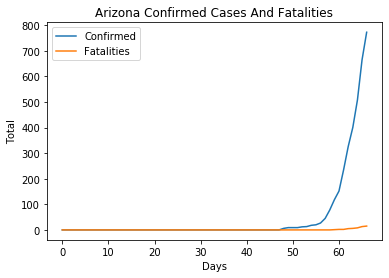

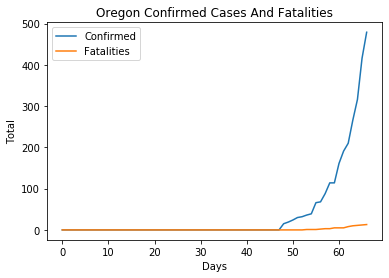

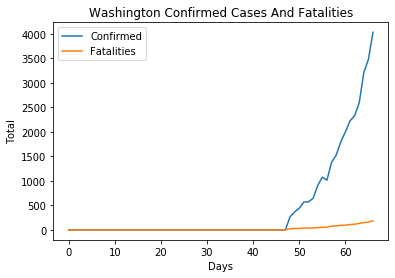

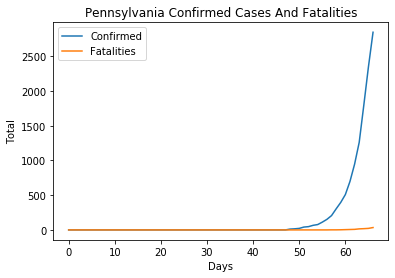

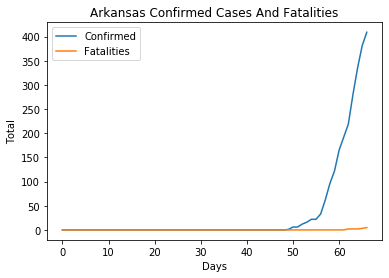

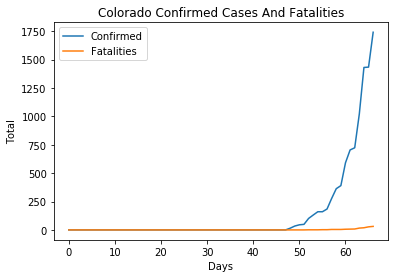

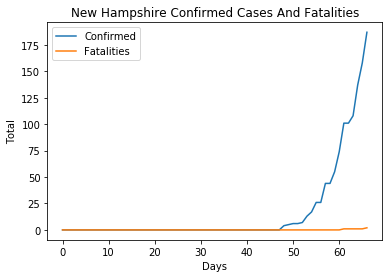

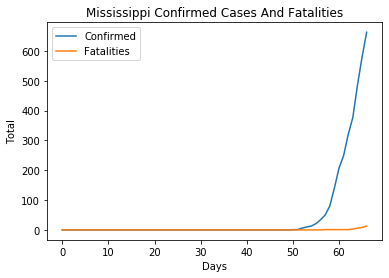

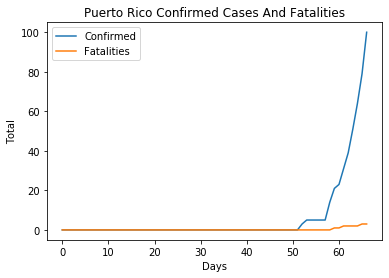

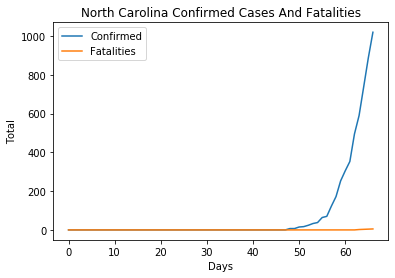

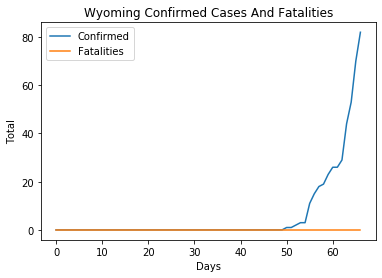

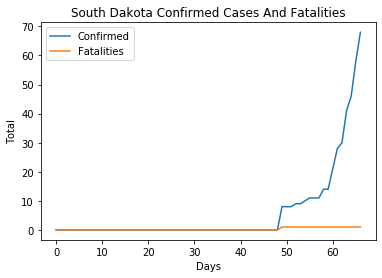

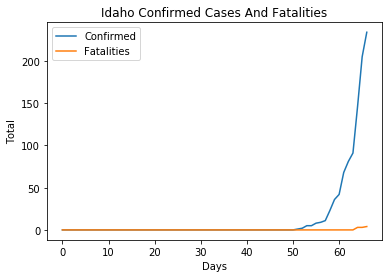

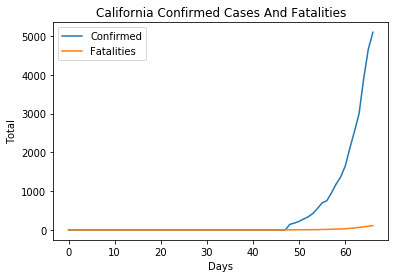

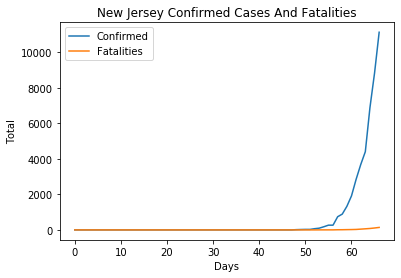

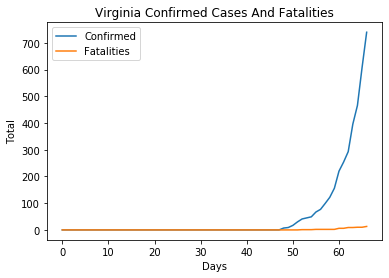

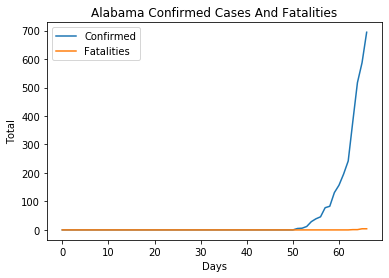

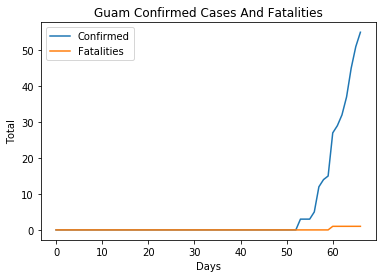

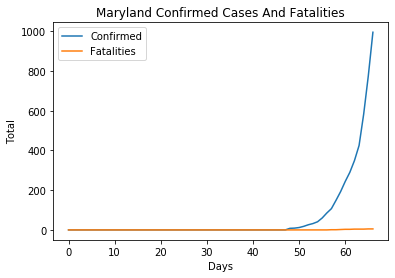

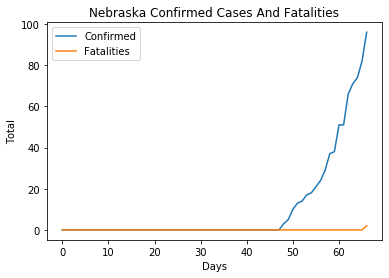

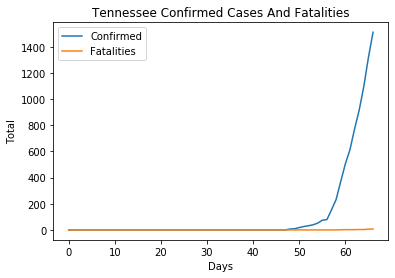

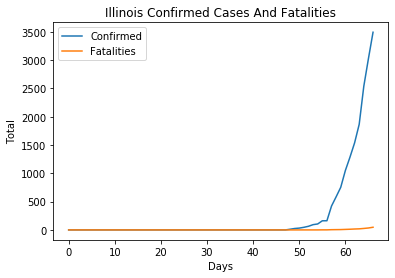

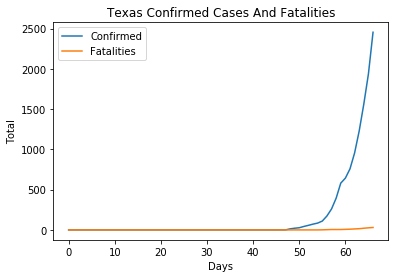

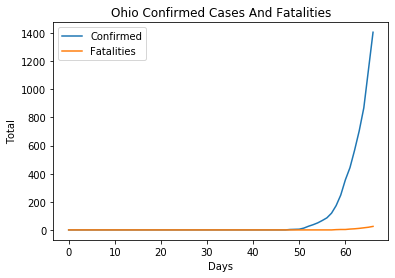

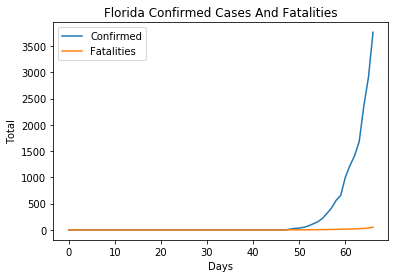

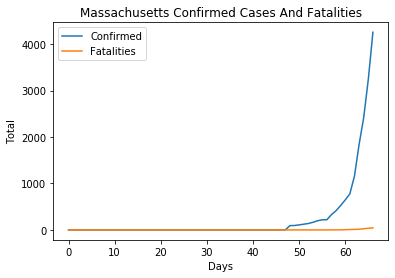

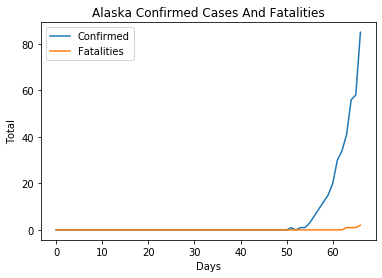

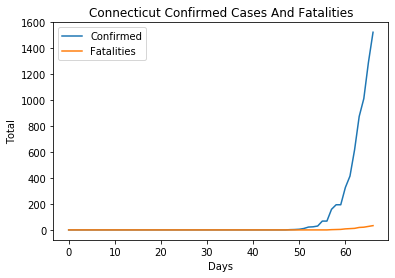

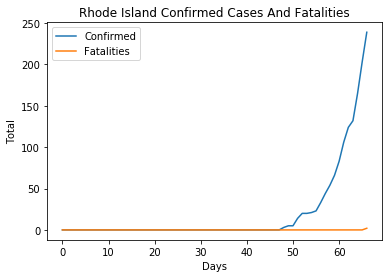

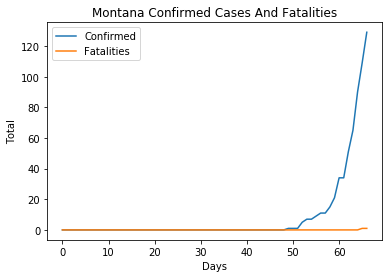

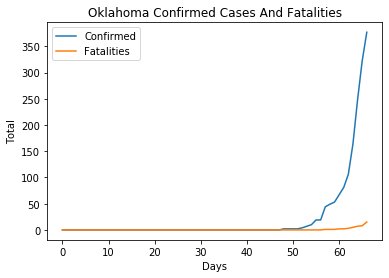

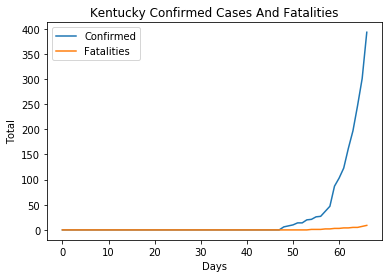

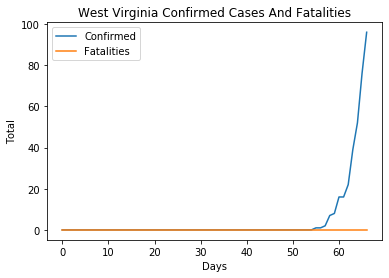

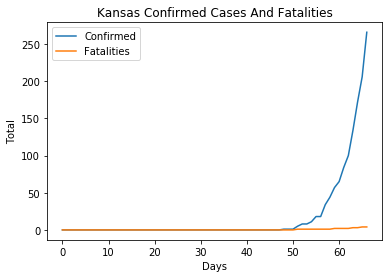

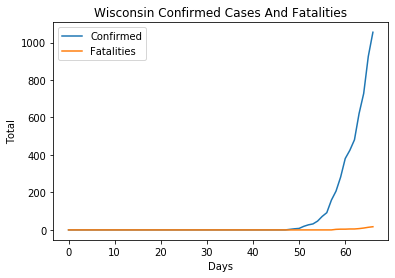

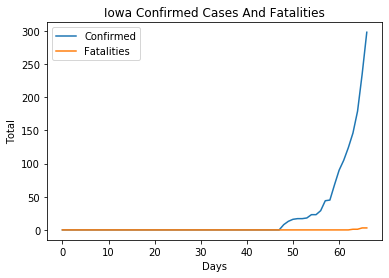

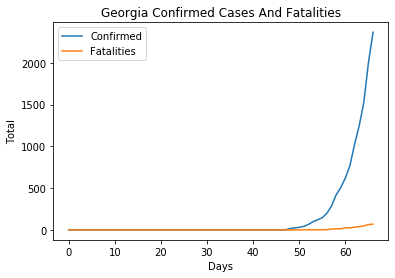

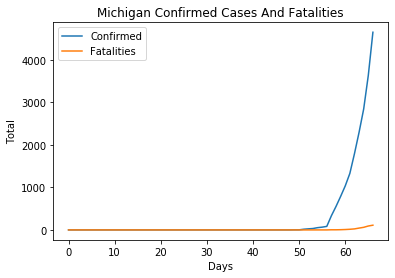

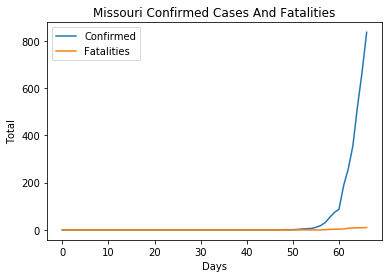

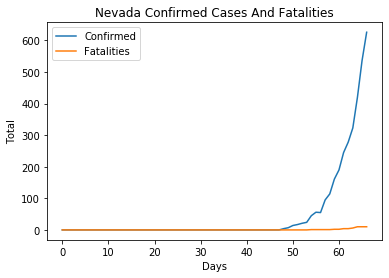

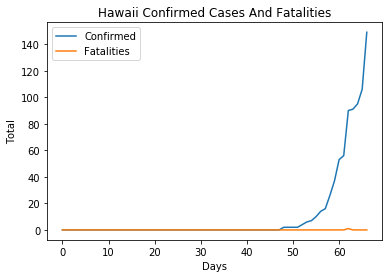

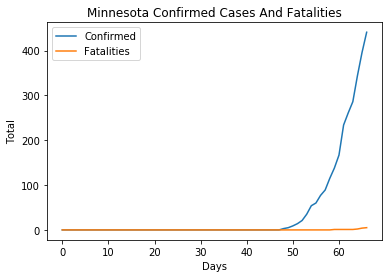

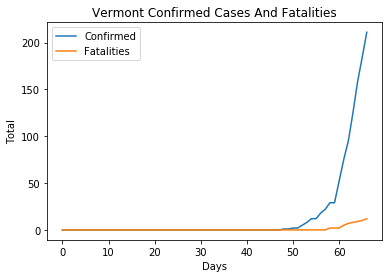

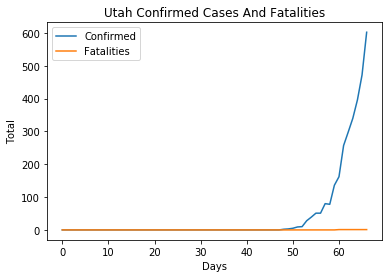

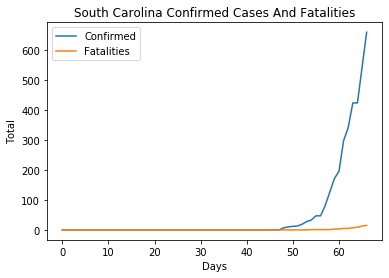

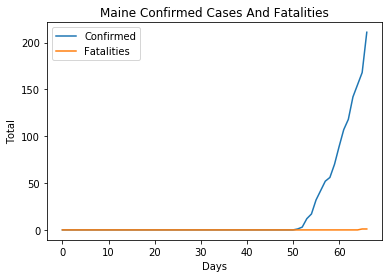

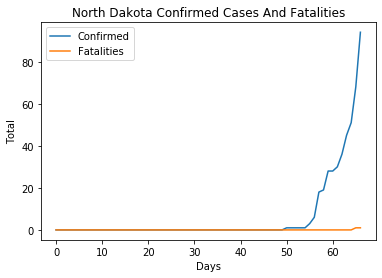

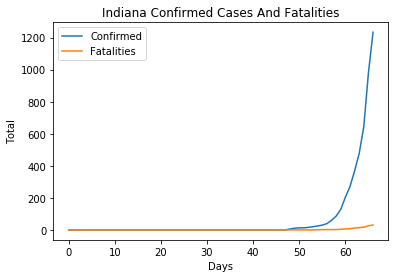

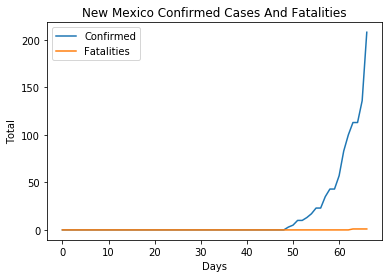

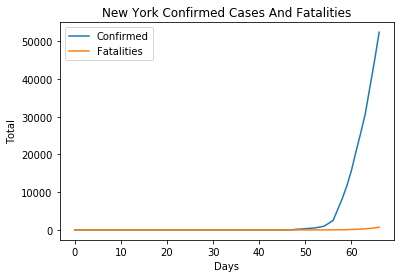

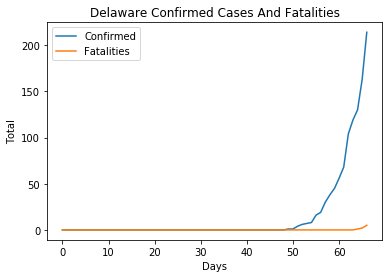

In [35]:
for state in us_states:
    plot_state_wise(state,df)

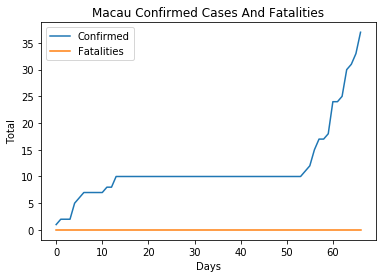

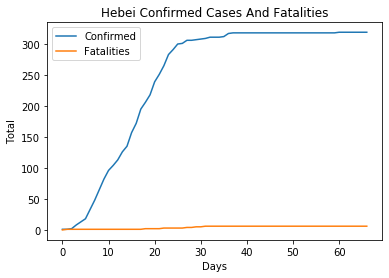

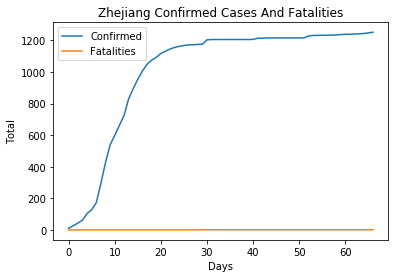

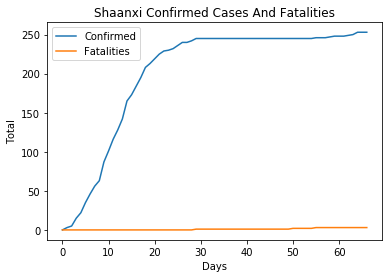

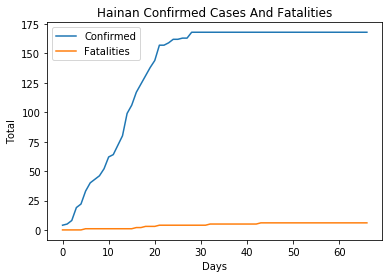

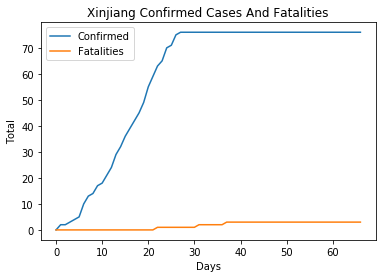

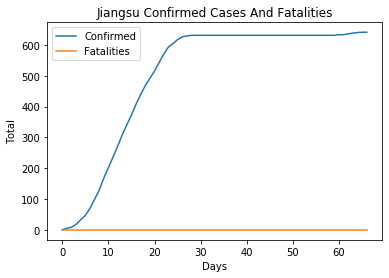

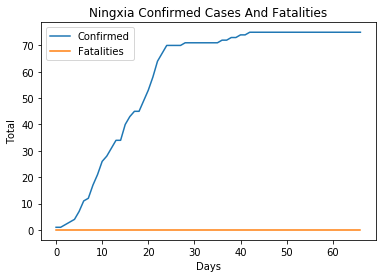

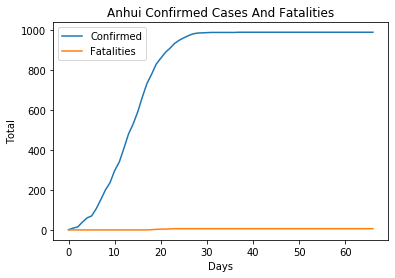

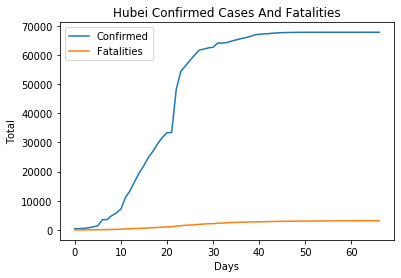

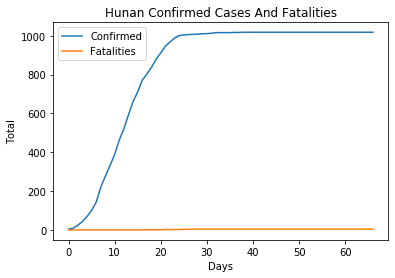

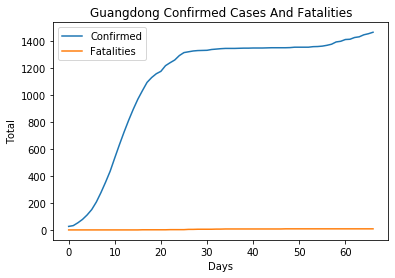

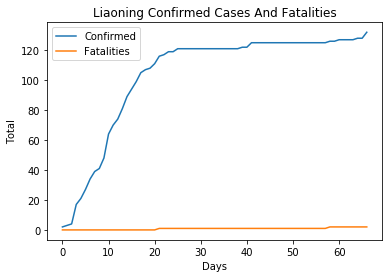

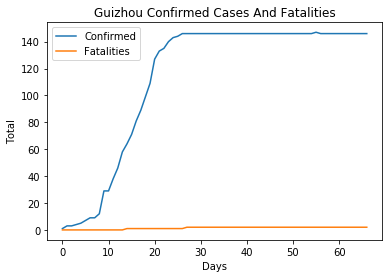

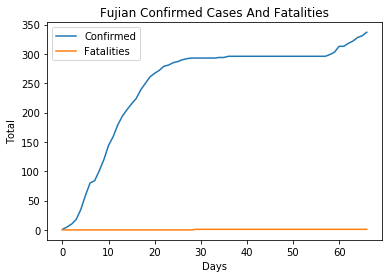

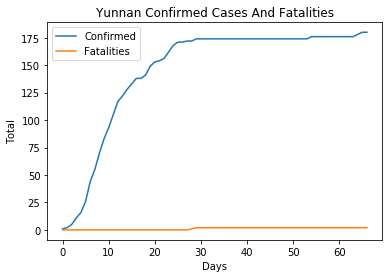

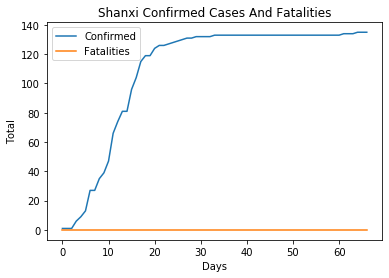

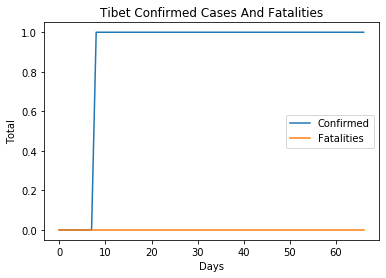

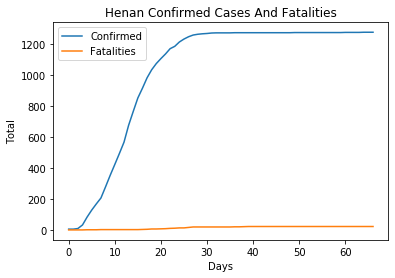

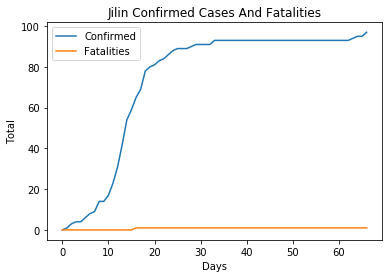

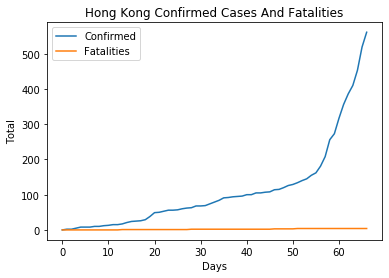

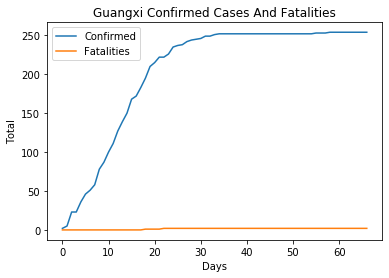

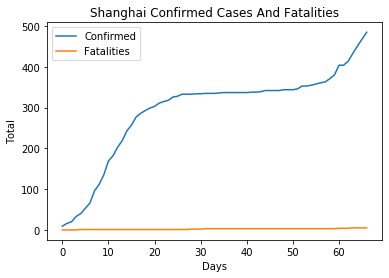

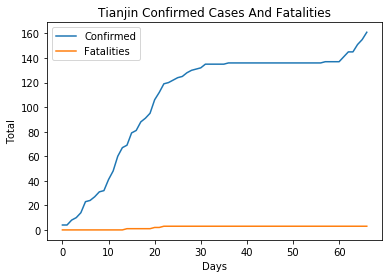

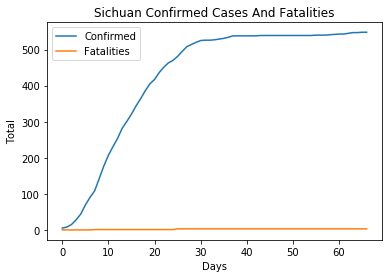

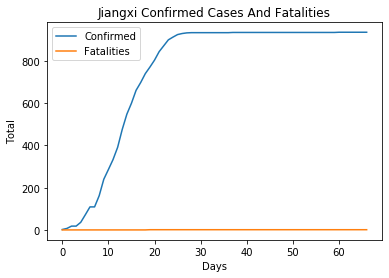

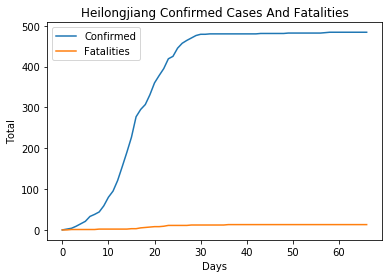

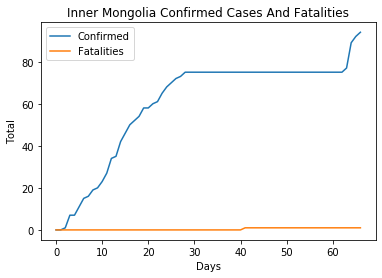

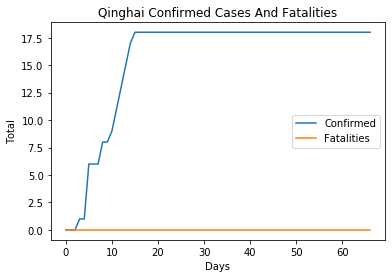

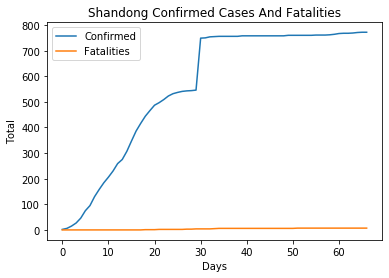

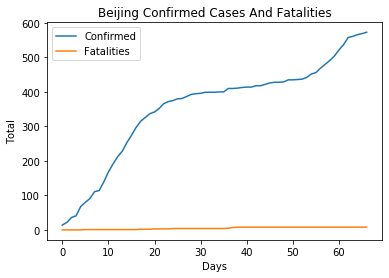

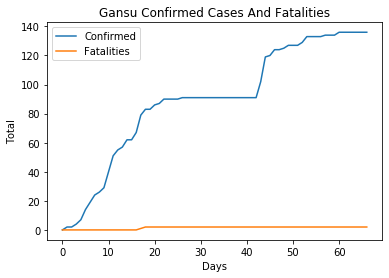

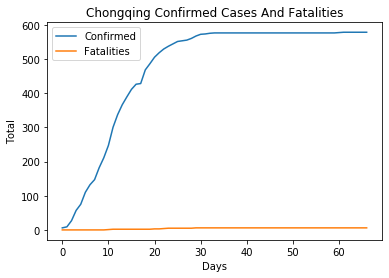

In [36]:
for state in china_states:
    plot_state_wise(state,df)

Now Let's Look At The Daily New Cases In Terms Of Country(India,China,US And Italy)

In [37]:
daily_us = df_us_consolidated.diff()
daily_china = df_china_consolidated.diff()
daily_india = df_india.drop(['Country_Region','Date','Province_State'],axis = 1).diff()
daily_italy = df_italy.drop(['Country_Region','Date','Province_State'],axis = 1).diff()

Helper Function To Plot Daily New Cases

In [38]:
def daily_cases_plot(country,df):
    plt.plot(df['ConfirmedCases'].values)
    plt.title(country + ' Daily Confirmed Cases')
    plt.xlabel('Days')
    plt.ylabel('Total')
    plt.show()

## Now To The Third And Final Question : Which Country Is Able To Control The Spread Of COVID-19 ?

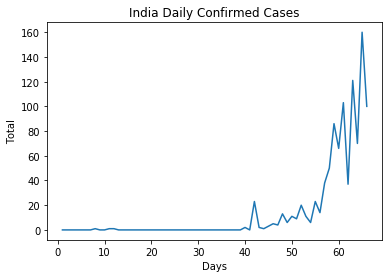

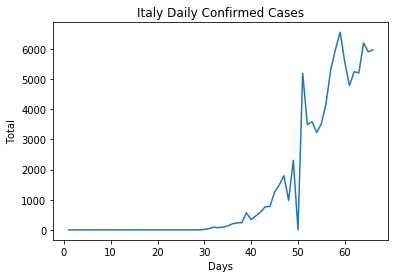

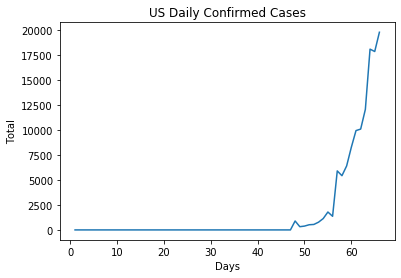

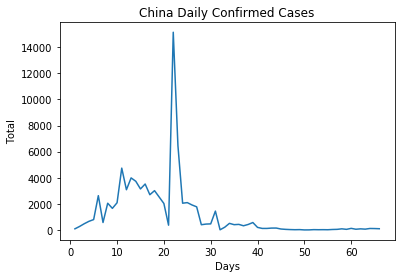

In [39]:
daily_cases_plot('India',daily_india)
daily_cases_plot('Italy',daily_italy)
daily_cases_plot('US',daily_us)
daily_cases_plot('China',daily_china)

If We Look At The Above Plots China Seems To Have Controlled The Spread Of COVID-19 In Its Population.

## 4. Train model and Measure Performance

Now Let's Train A Model To Predict Fatalities 

Importing Neccessary Libraries

In [40]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Fetching The Dataset, Applying Transformations And Splitting Into Training And Test Dataset

In [41]:
new_df = df.groupby(['Country_Region','Date'],as_index = False)['ConfirmedCases','Fatalities'].sum()

In [42]:
X = pd.get_dummies(data = df[['Country_Region','ConfirmedCases']])
Y = df['Fatalities'].values

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .10, random_state = 40)

Initiating A Linear Regression Model And Fitting It To Our Dataset

In [44]:
model = linear_model.LinearRegression().fit(X_train, Y_train)

Using The Model To Predict On Test Set And Getting The R2 Score

In [45]:
predicted = model.predict(X_test)

In [46]:
r2_score(Y_test, predicted)

0.892599626728983

## 5. Results

1. We Found Out How Different Countries Compare To Each Other In Terms Of Confirmed Cases And Fatalities And In Doing So We Also Found Out Top 10 Countries In Terms Of Confirmed Cases Has About 82% Of The Total Confirmed Cases In The World And Top 10 Countries In Terms Of Fatalities Has About 93% Of The Total Fatalities In The World.
2. We Then Looked At How Different States And Provinces Compare To Each Other And We Found That Stunning Majority Of Cases In US Comes From New York And New Jersey Signalling Some Serious Flaws In Efforts To Contain The Spread Of Virus.
3. Finally, We Looked At Which Country Is Somewhat Able To Control The Spread Of COVID-19 And Found Out That China Has Somewhat Able To Control It.

We Also Trained A Fatalities Predictor Which Was Able To Get R2 Score Of 0.89